In [ ]:
#import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection as sk
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load data set 
cols = ["fLength",  "fWidth" , "fSize", "fConc","fConc1",  "fAsym ", "fM3Long ", " fM3Trans","fAlpha" , "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()


fLength    fWidth   fSize   fConc  fConc1    fAsym   fM3Long    fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110    -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238    -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633    -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525    21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# convert the class into zeros and ones
df["class"] = (df["class"] == "g").astype(int)


In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1    fAsym   fM3Long    fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110    -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238    -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633    -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525    21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

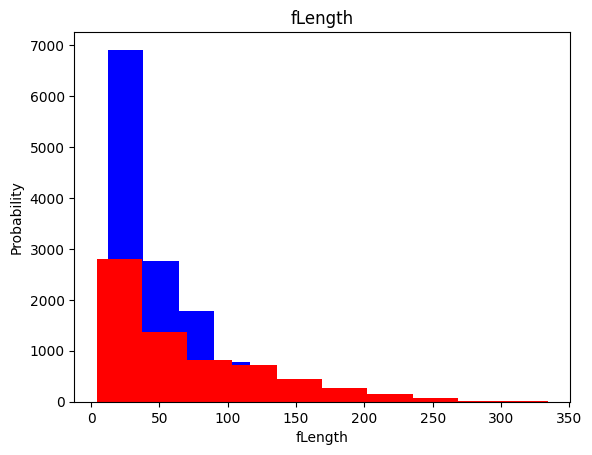

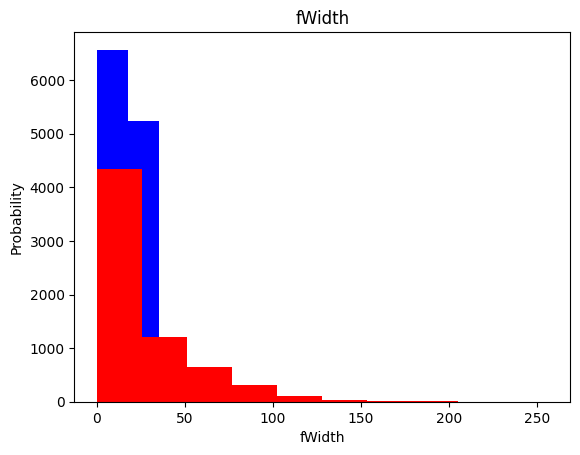

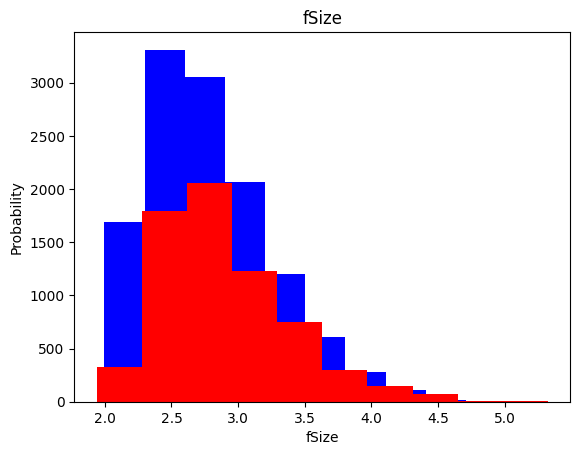

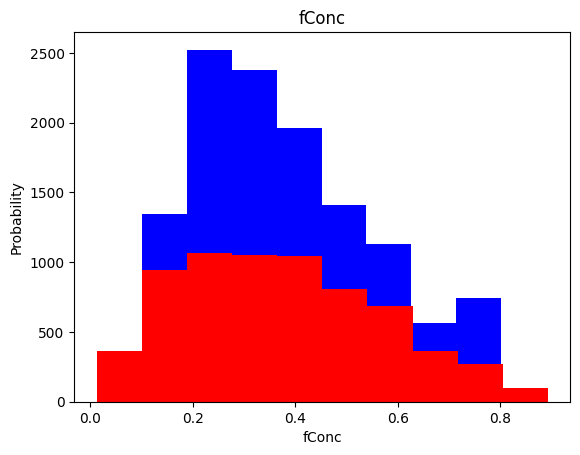

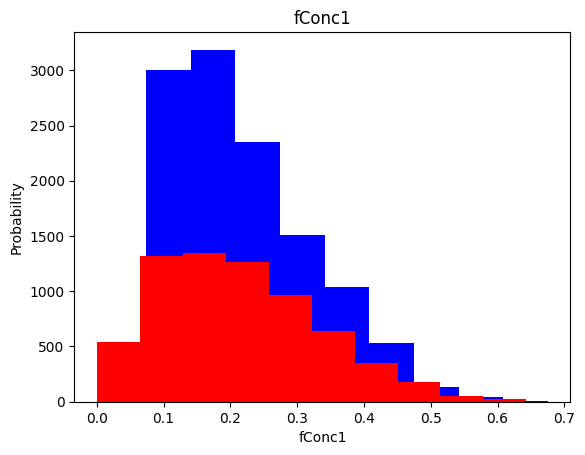

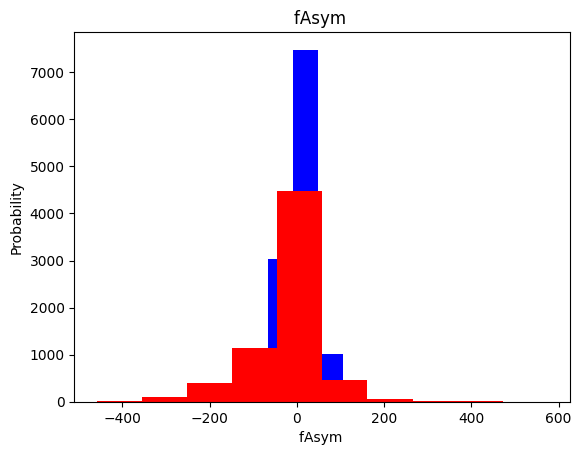

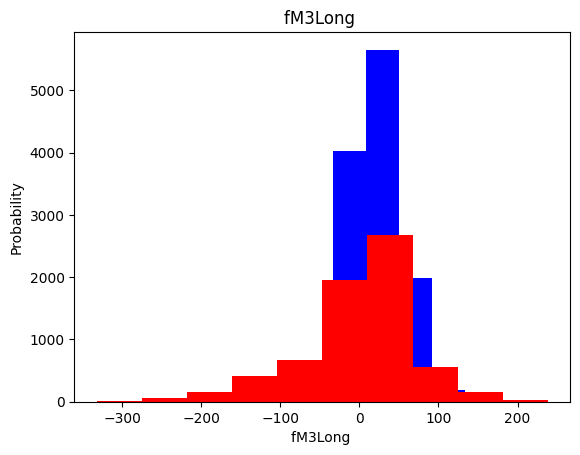

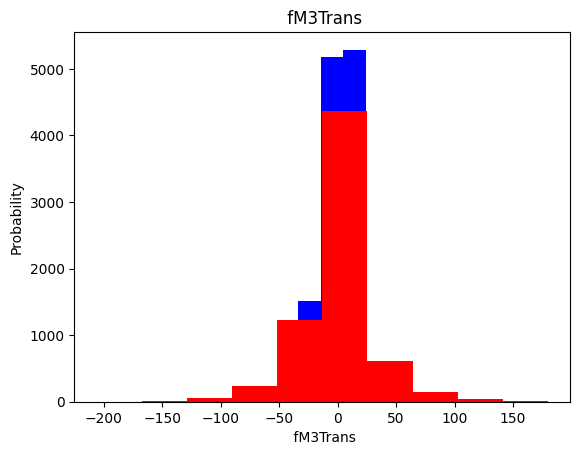

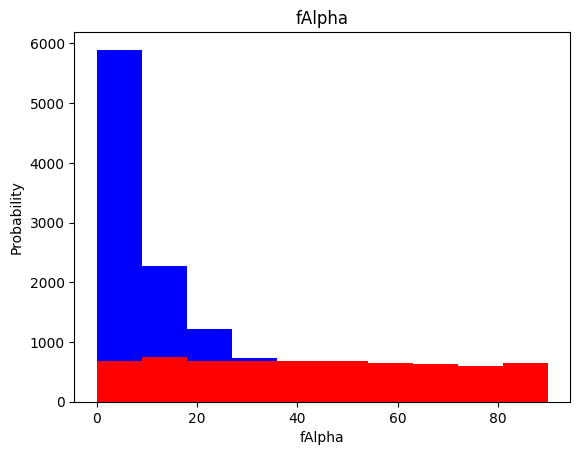

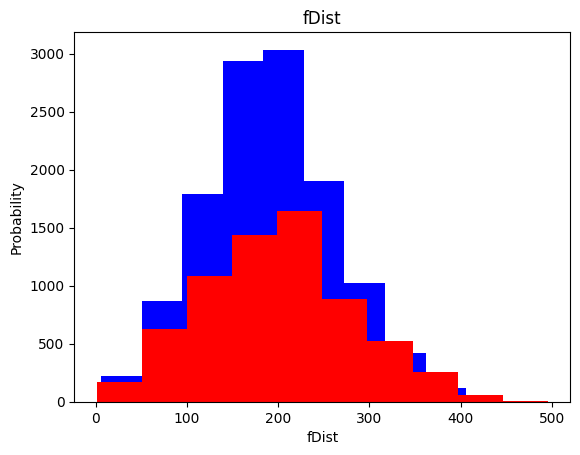

In [ ]:
for label in cols[: -1]:
  plt.hist(df[df["class"]==1][label], color= "blue", label="Gamma")
  plt.hist(df[df["class"]==0][label], color= "red", label="Gamma")
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.show()

In [ ]:
#splitting data into training validation anad test datasets
# x = df.cols[: -1].values
# y = df.cols[-1].values
# print(x.shape, y.shape)

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# standardizing values using standard scaler 
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
#create an instance of the model
knn_model = KNeighborsClassifier(n_neighbors= 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#predicting output 
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1339
           1       0.83      0.89      0.86      2465

    accuracy                           0.81      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.81      0.81      0.80      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Instantiating the model
nb_model= GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred= nb_model.predict(X_test)
print(y_pred)
print (classification_report(y_test, y_pred))

[1 1 1 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1339
           1       0.74      0.89      0.81      2465

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model =LogisticRegression()

log_model =log_model.fit(X_train, y_train)


In [ ]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1353
           1       0.84      0.81      0.82      2451

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [ ]:
from sklearn.svm import SVC



In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict((X_test ))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1353
           1       0.89      0.90      0.89      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net Implimentation

In [ ]:
import tensorflow as tf

In [ ]:
def train_nn(X_train, y_train, num_nodes, dropout_prob,lr,batch_size, epochs ):
  nn_model= tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation= 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation = 'sigmoid'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])
  nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss ='binary_crossentropy', metrics= ['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs = 100,batch_size= 32, validation_split= 0.2, verbose = 0
)
  return nn_model, history 
  

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


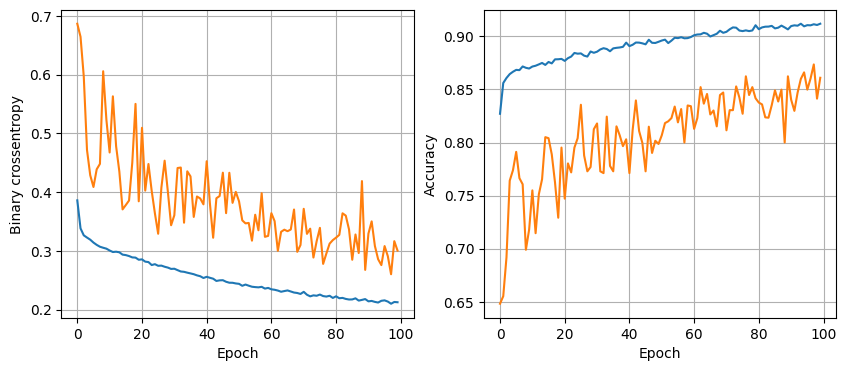

119/119 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8486
16 nodes, dropout 0, lr 0.01, batch size 64


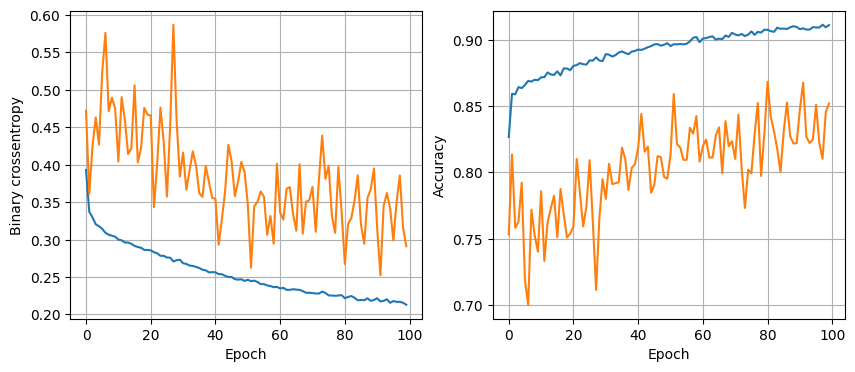

119/119 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8567
16 nodes, dropout 0, lr 0.01, batch size 128


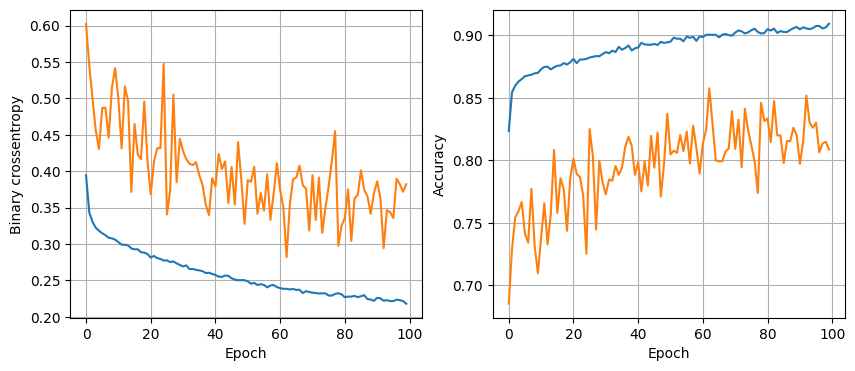

119/119 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.005, batch size 32


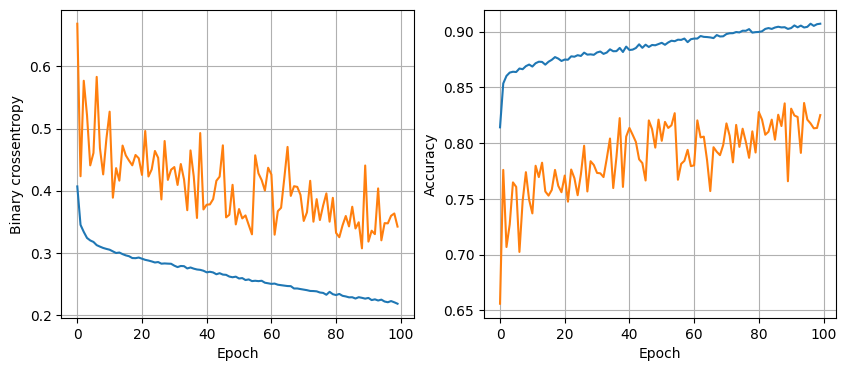

119/119 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8657
16 nodes, dropout 0, lr 0.005, batch size 64


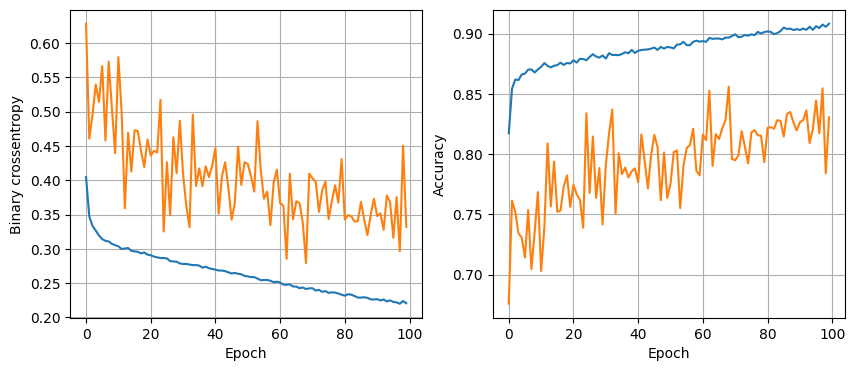

119/119 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch size 128


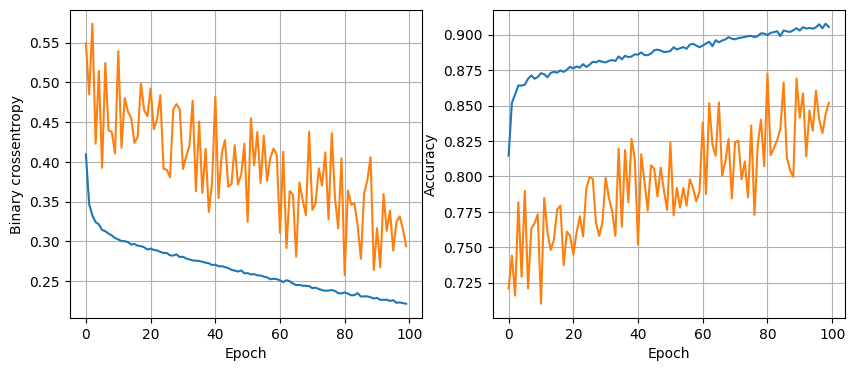

119/119 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8557
16 nodes, dropout 0, lr 0.001, batch size 32


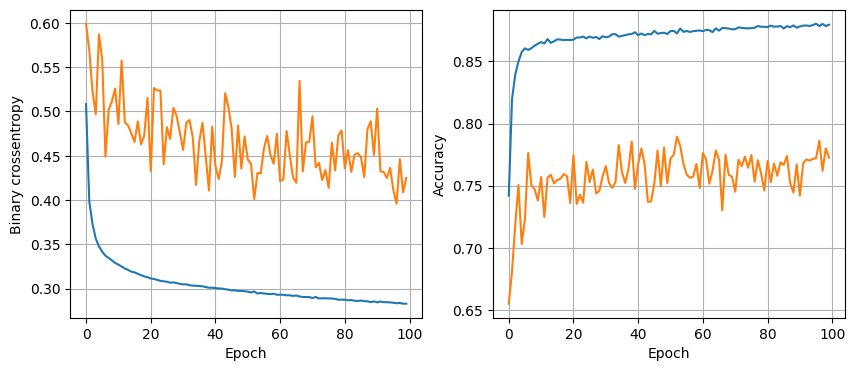

119/119 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 64


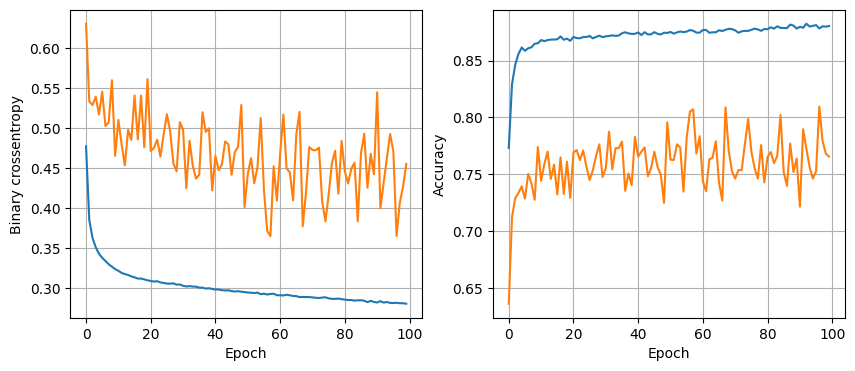

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.001, batch size 128


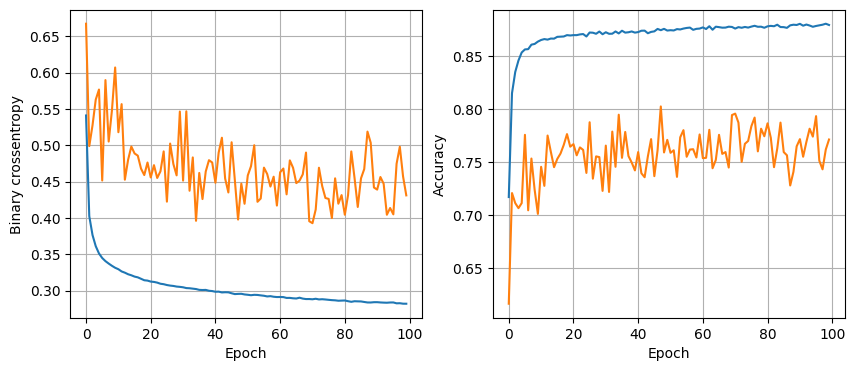

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.01, batch size 32


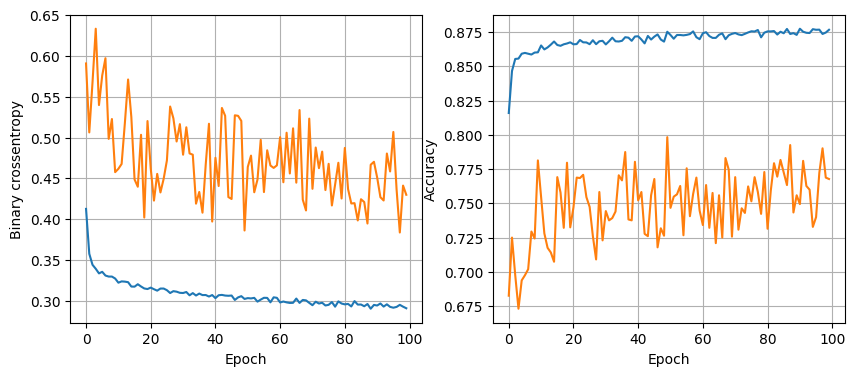

119/119 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.01, batch size 64


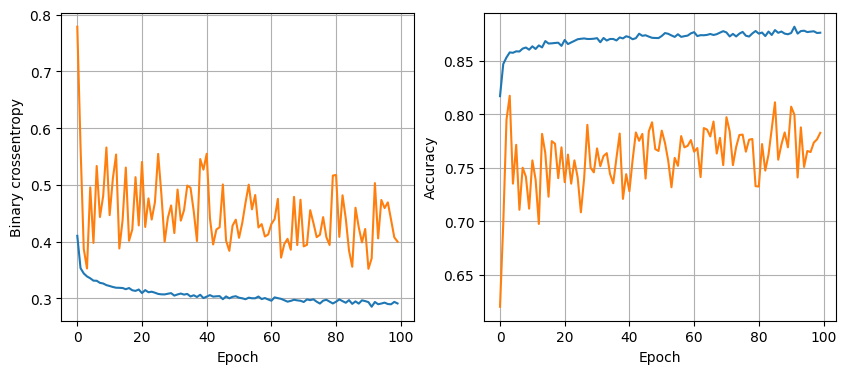

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8738
16 nodes, dropout 0.2, lr 0.01, batch size 128


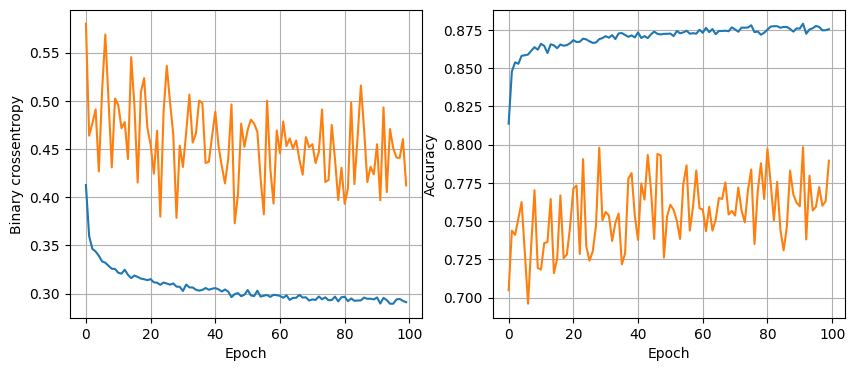

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch size 32


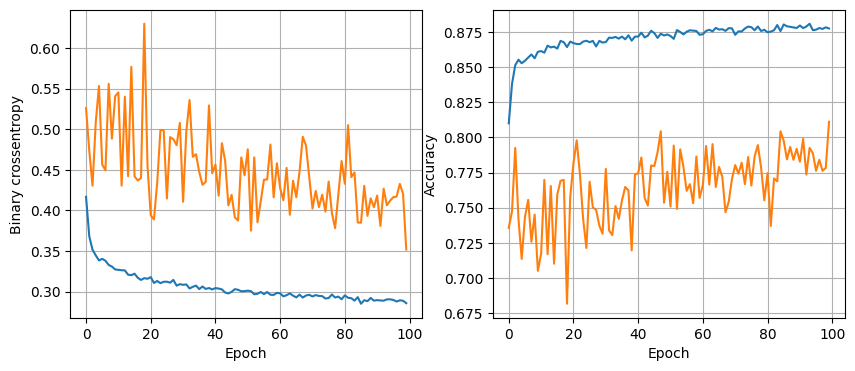

119/119 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.005, batch size 64


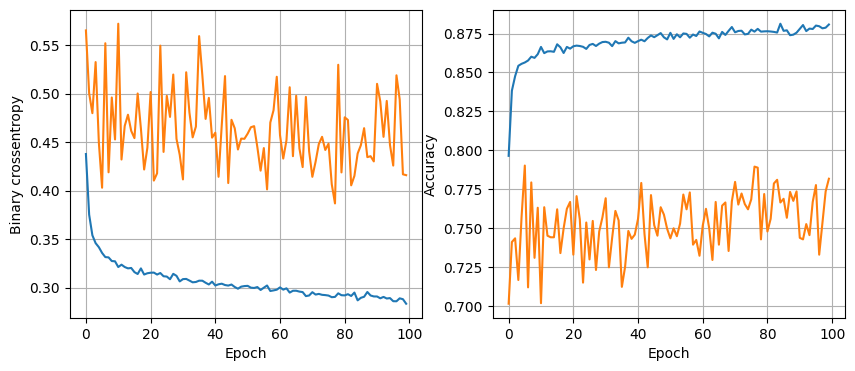

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8770
16 nodes, dropout 0.2, lr 0.005, batch size 128


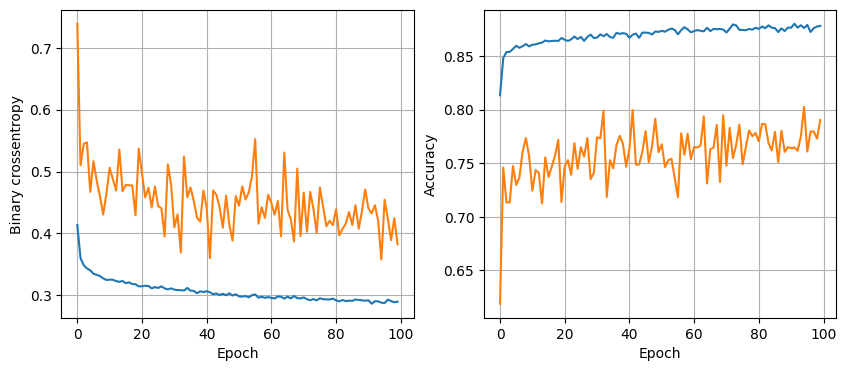

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.001, batch size 32


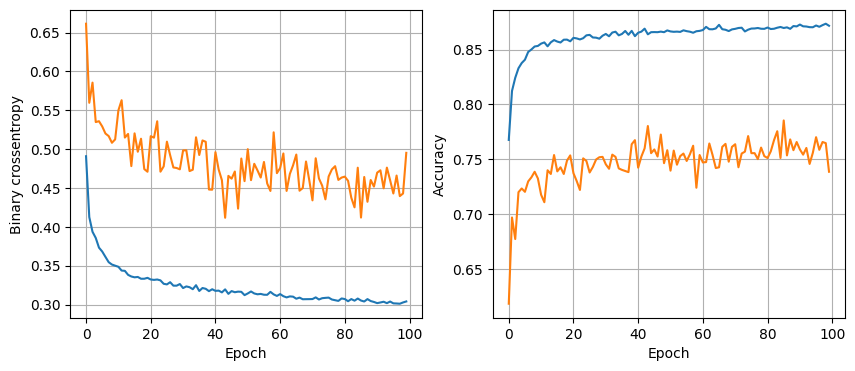

119/119 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.001, batch size 64


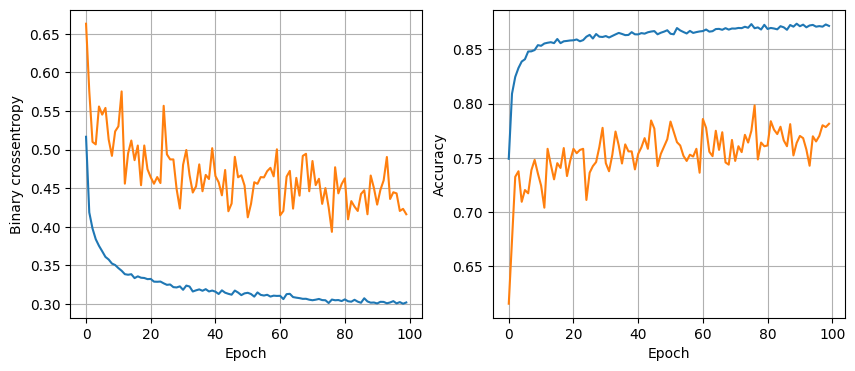

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.001, batch size 128


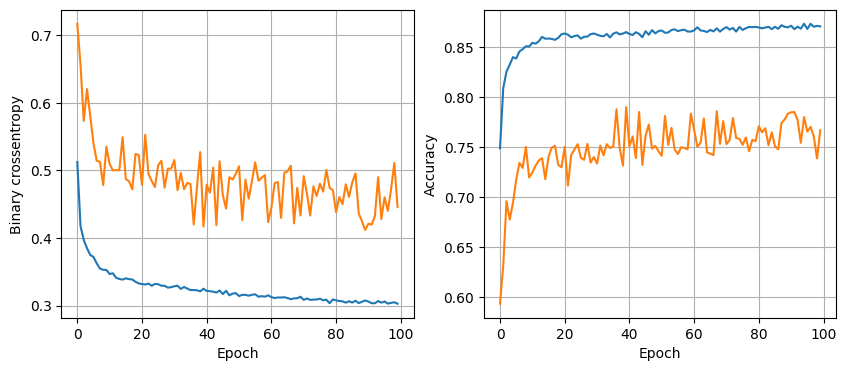

119/119 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8759
32 nodes, dropout 0, lr 0.01, batch size 32


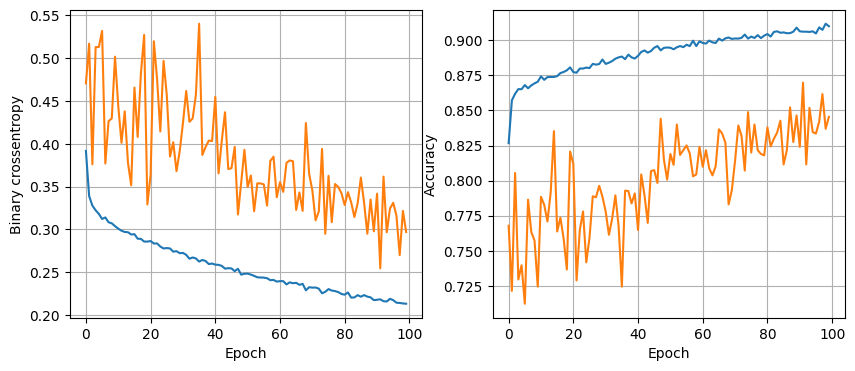

119/119 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8562
32 nodes, dropout 0, lr 0.01, batch size 64


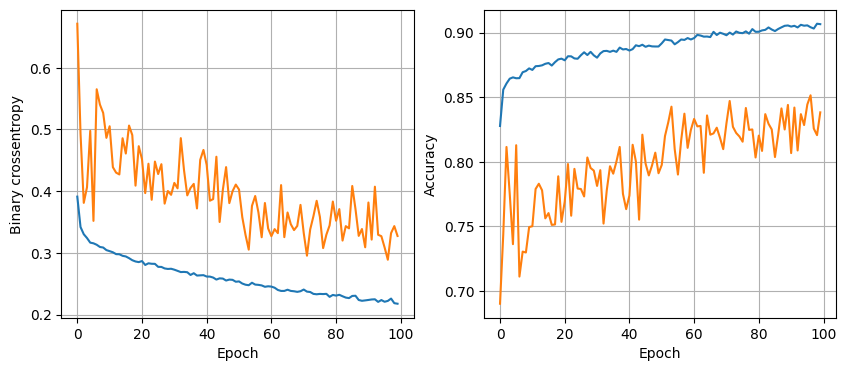

119/119 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8599
32 nodes, dropout 0, lr 0.01, batch size 128


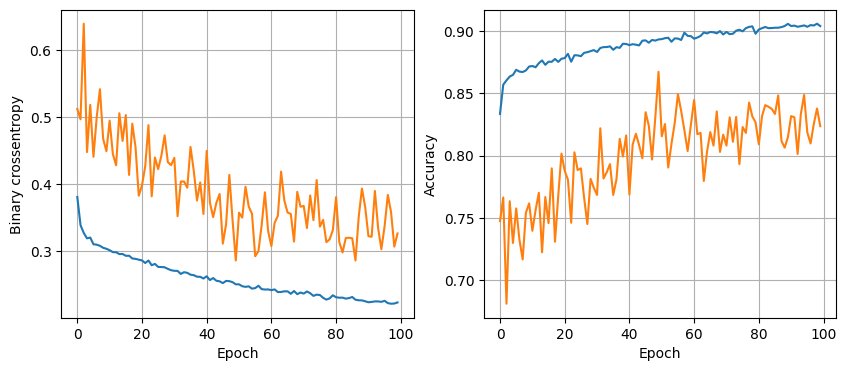

119/119 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8625
32 nodes, dropout 0, lr 0.005, batch size 32


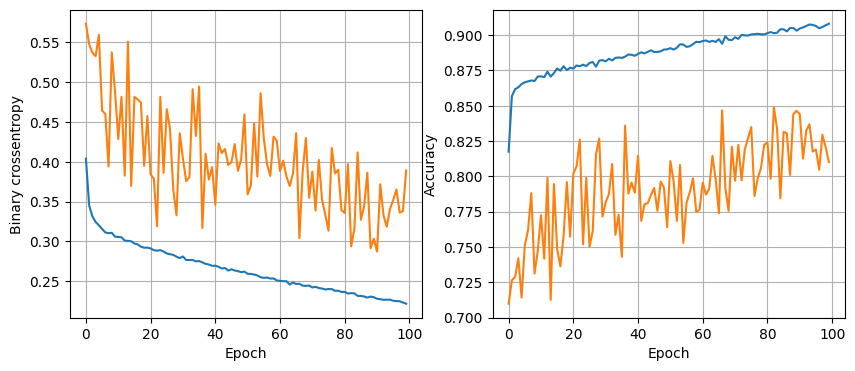

119/119 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8628
32 nodes, dropout 0, lr 0.005, batch size 64


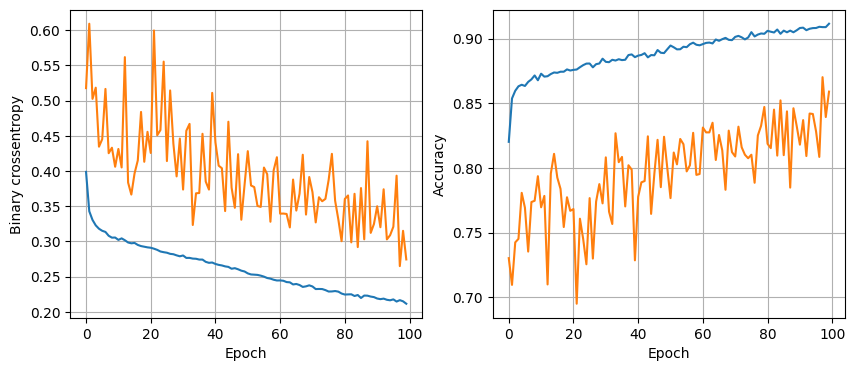

119/119 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch size 128


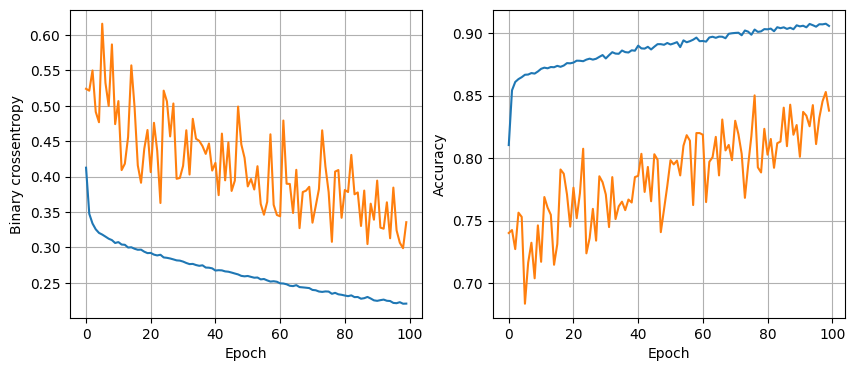

119/119 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.001, batch size 32


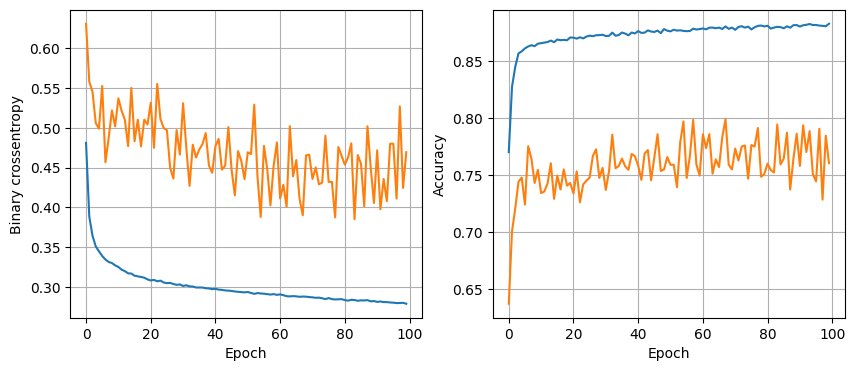

119/119 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8730
32 nodes, dropout 0, lr 0.001, batch size 64


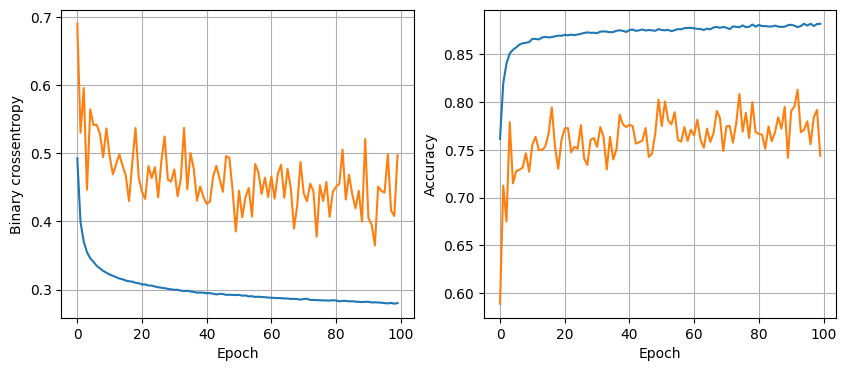

119/119 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8778
32 nodes, dropout 0, lr 0.001, batch size 128


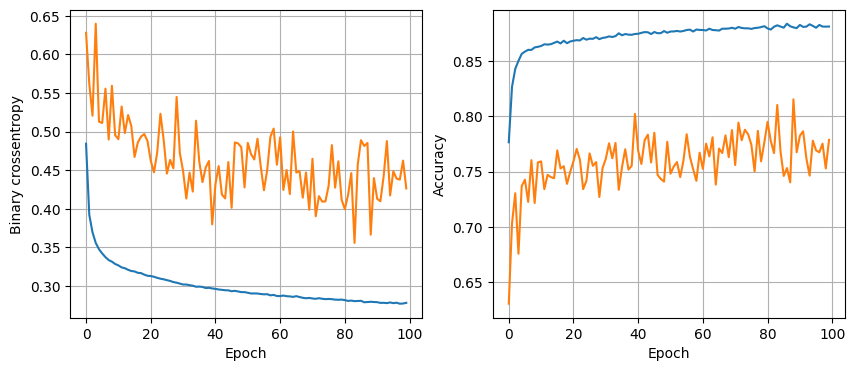

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.01, batch size 32


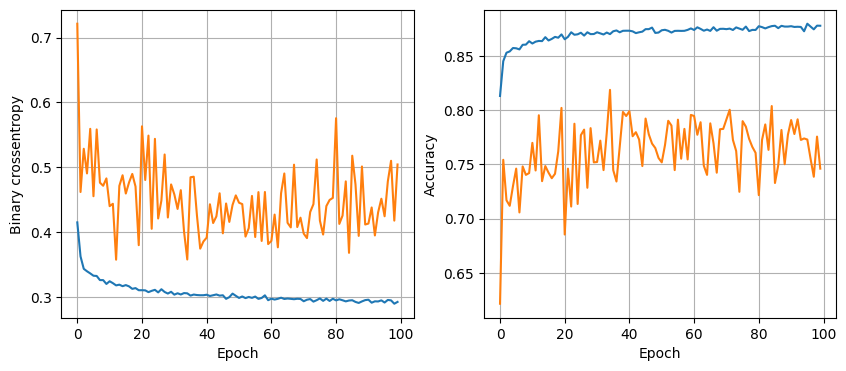

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.01, batch size 64


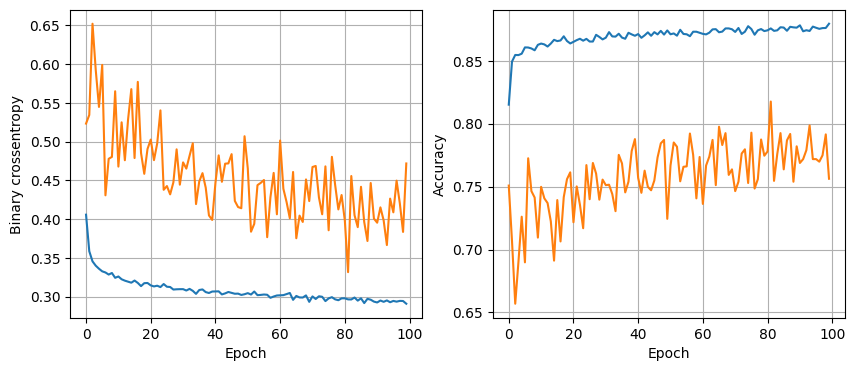

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8670
32 nodes, dropout 0.2, lr 0.01, batch size 128


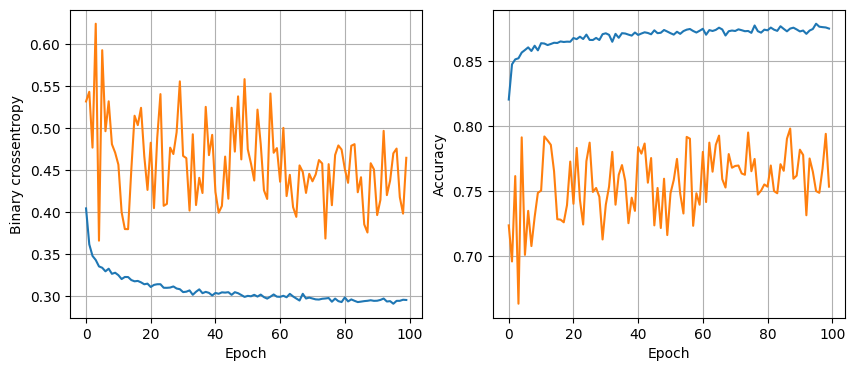

119/119 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.005, batch size 32


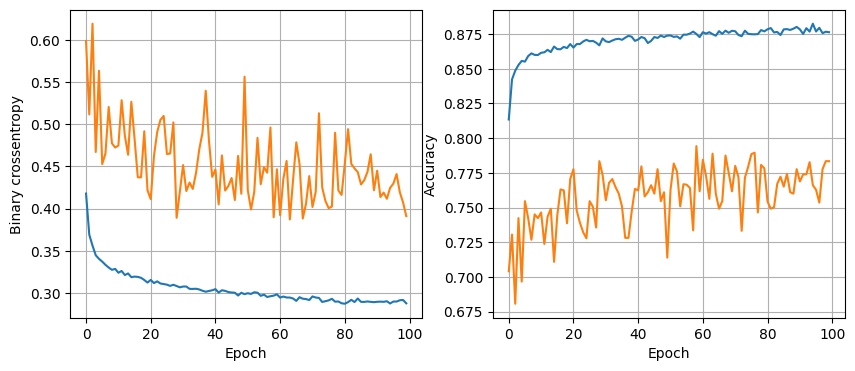

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 64


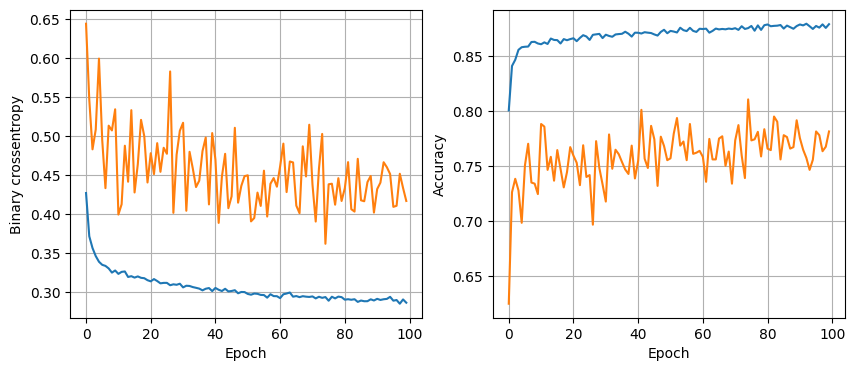

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8680
32 nodes, dropout 0.2, lr 0.005, batch size 128


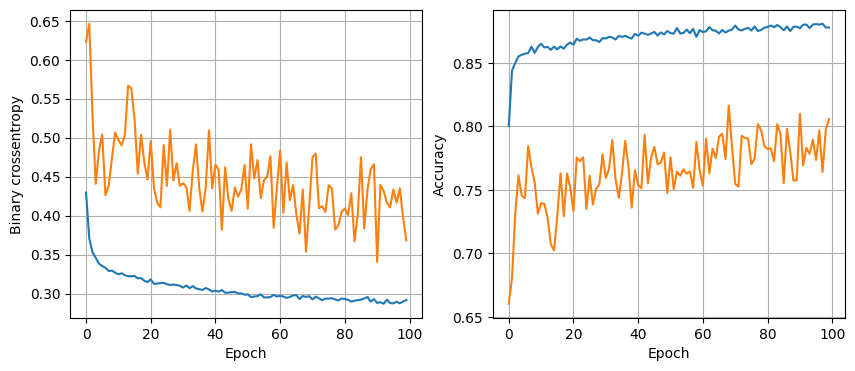

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.001, batch size 32


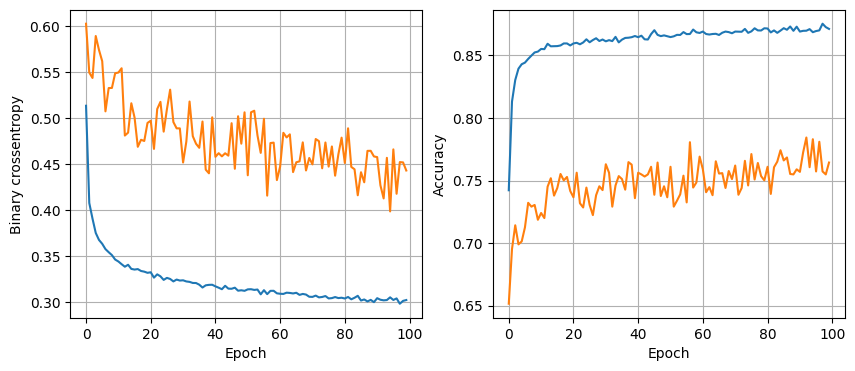

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch size 64


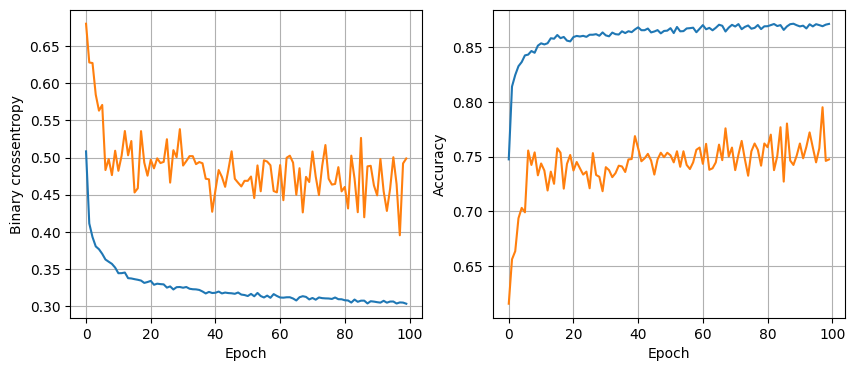

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.001, batch size 128


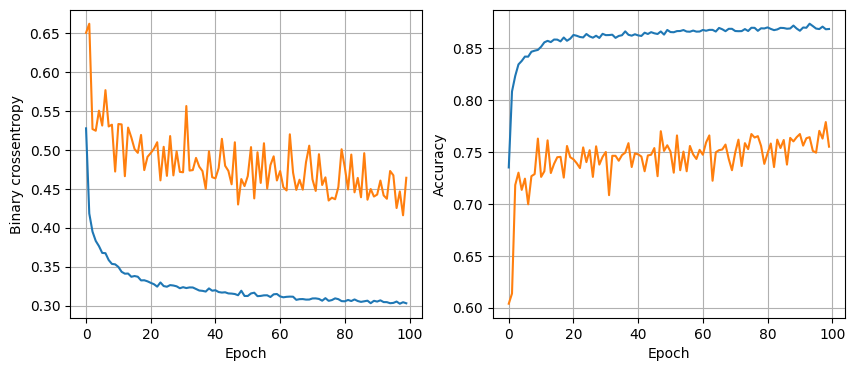

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8728
64 nodes, dropout 0, lr 0.01, batch size 32


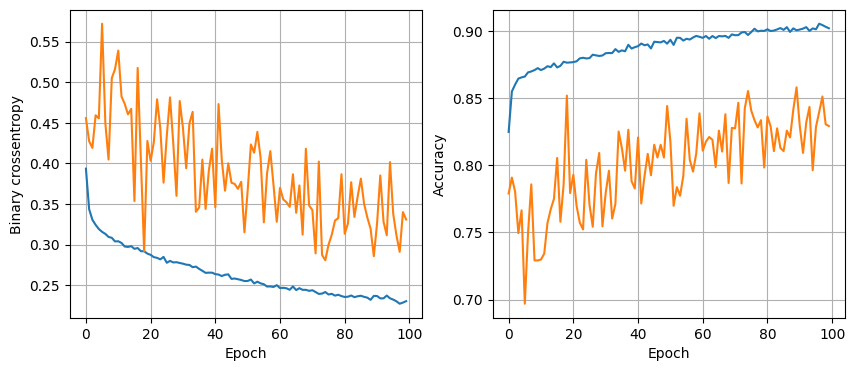

119/119 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.01, batch size 64


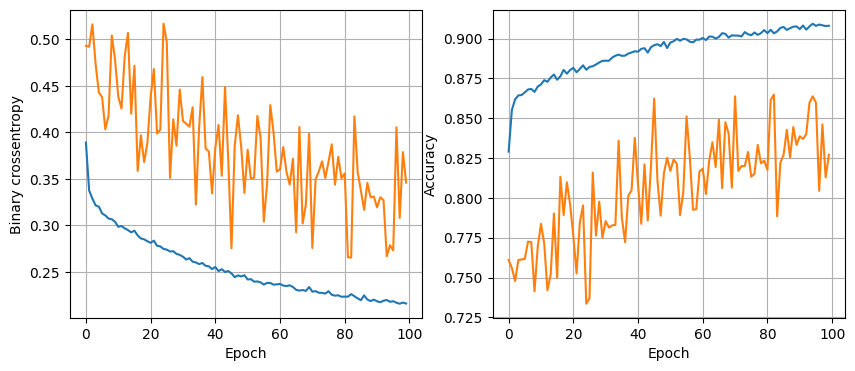

119/119 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.01, batch size 128


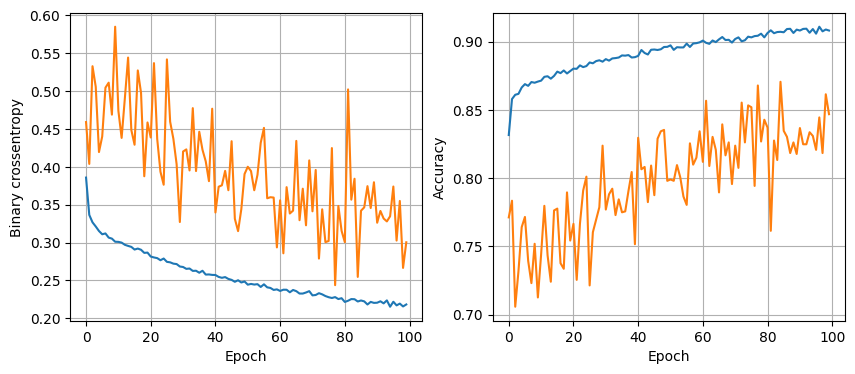

119/119 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.005, batch size 32


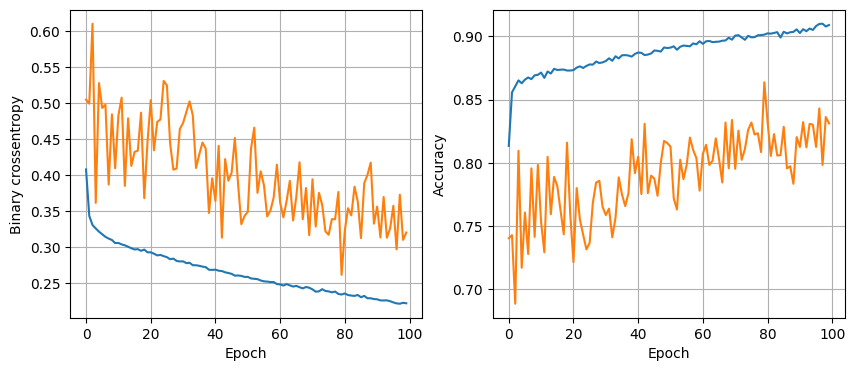

119/119 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.005, batch size 64


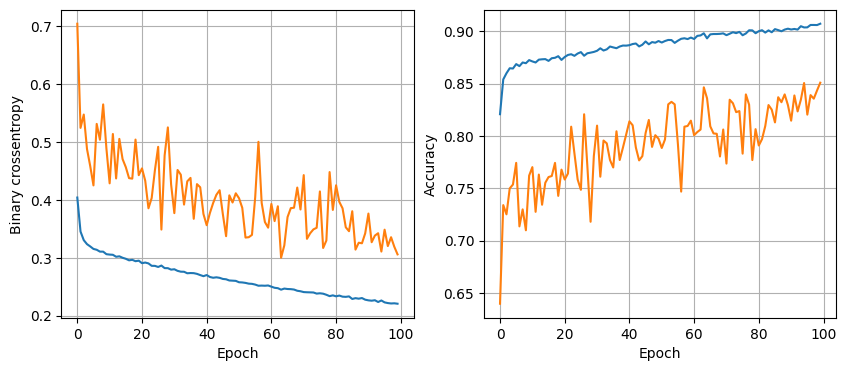

119/119 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.005, batch size 128


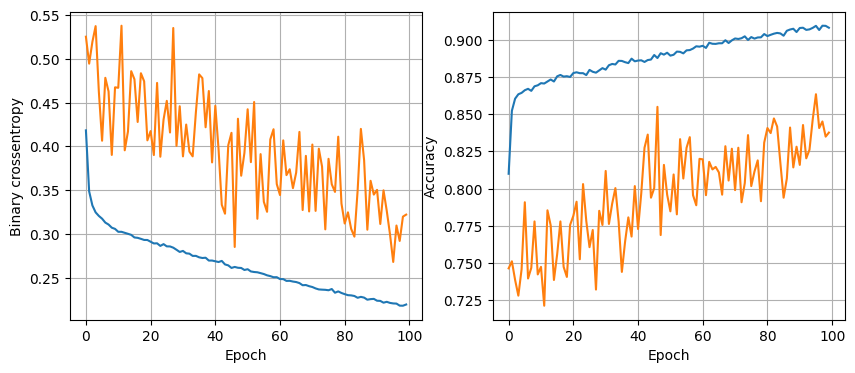

119/119 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.001, batch size 32


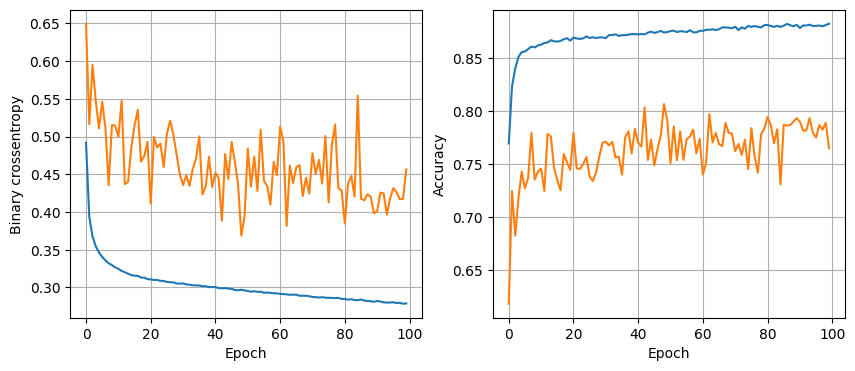

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8751
64 nodes, dropout 0, lr 0.001, batch size 64


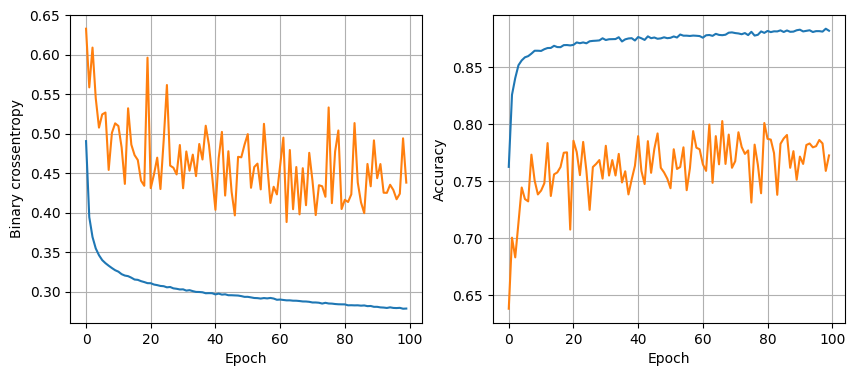

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8712
64 nodes, dropout 0, lr 0.001, batch size 128


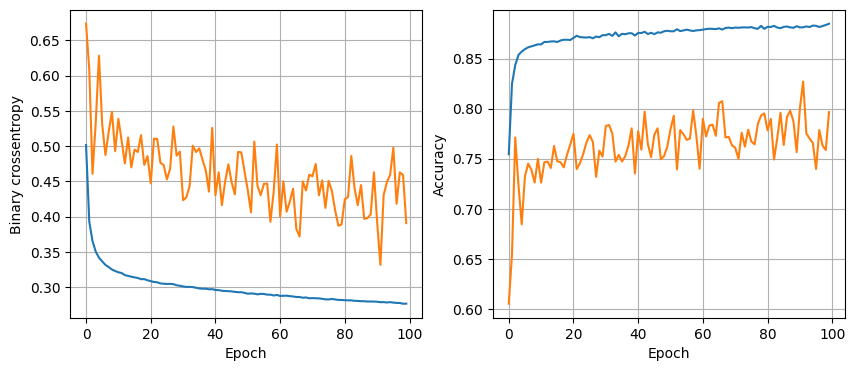

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8691
64 nodes, dropout 0.2, lr 0.01, batch size 32


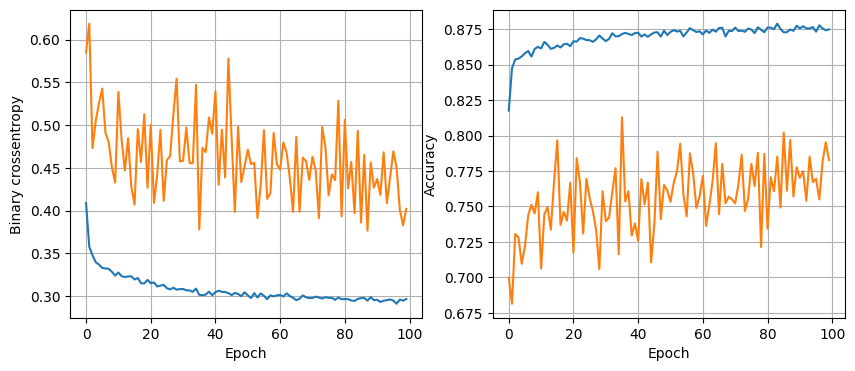

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.01, batch size 64


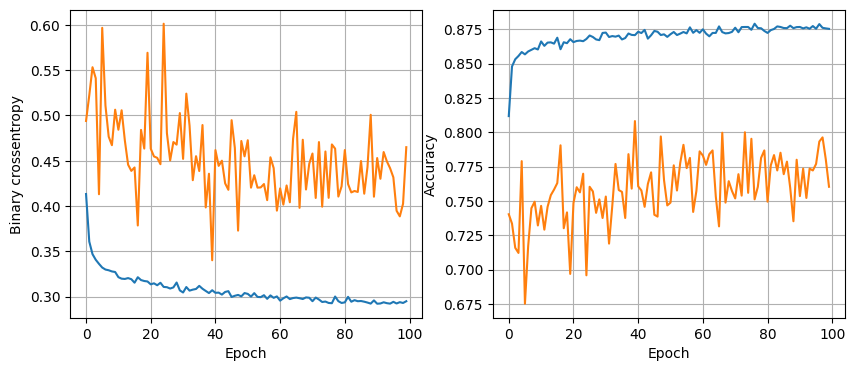

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8693
64 nodes, dropout 0.2, lr 0.01, batch size 128


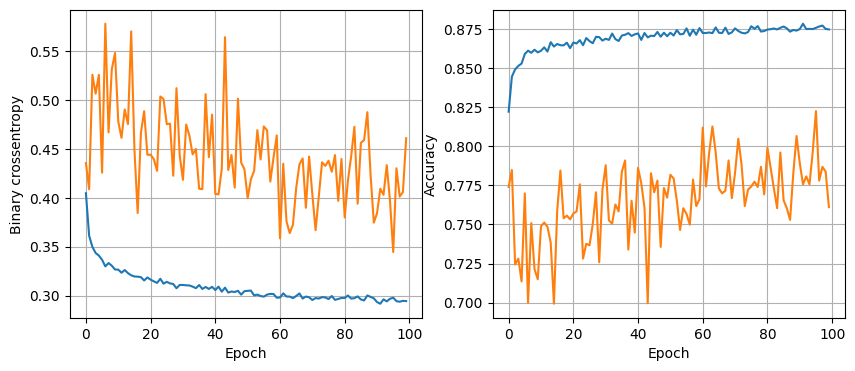

119/119 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch size 32


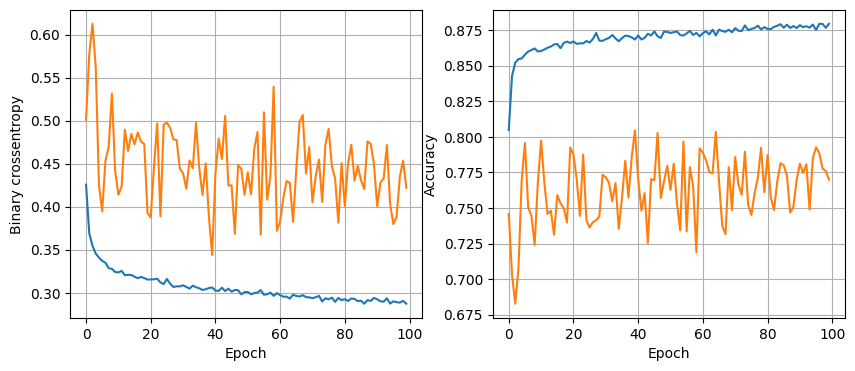

119/119 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.005, batch size 64


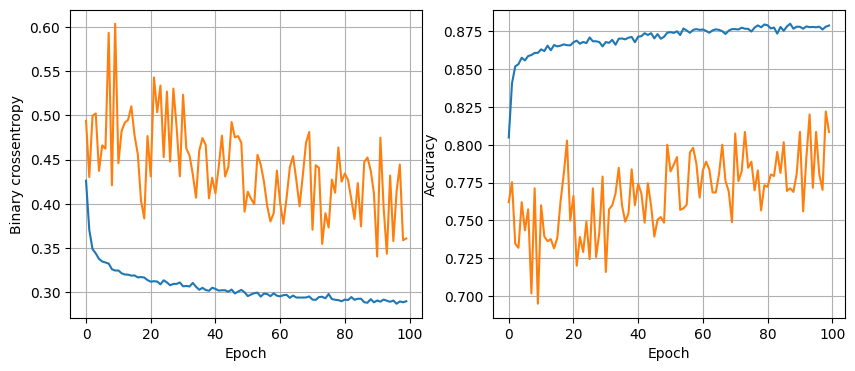

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.005, batch size 128


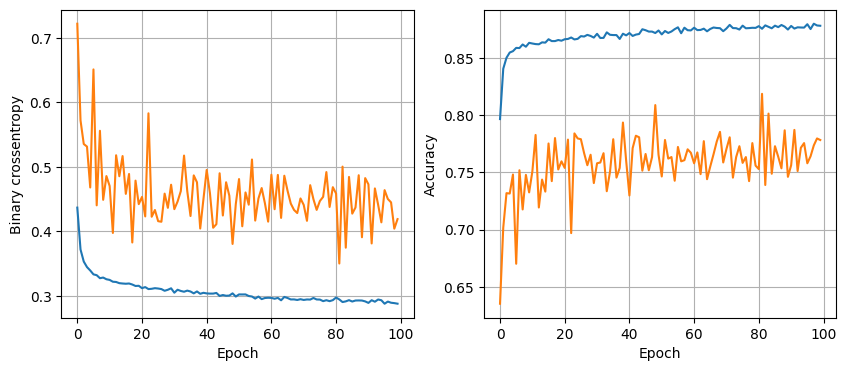

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.001, batch size 32


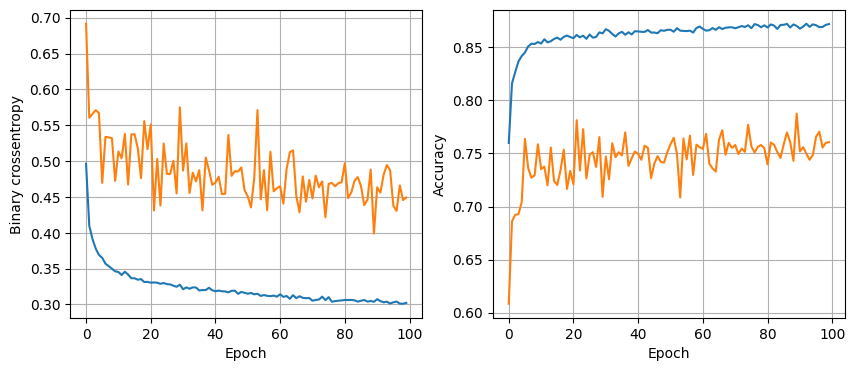

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.001, batch size 64


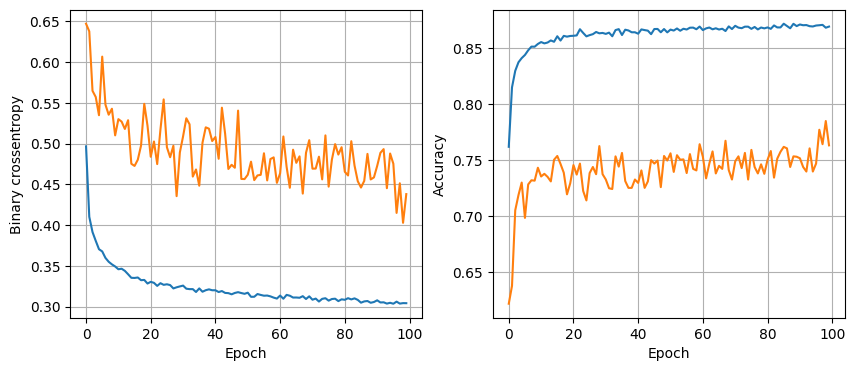

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.001, batch size 128


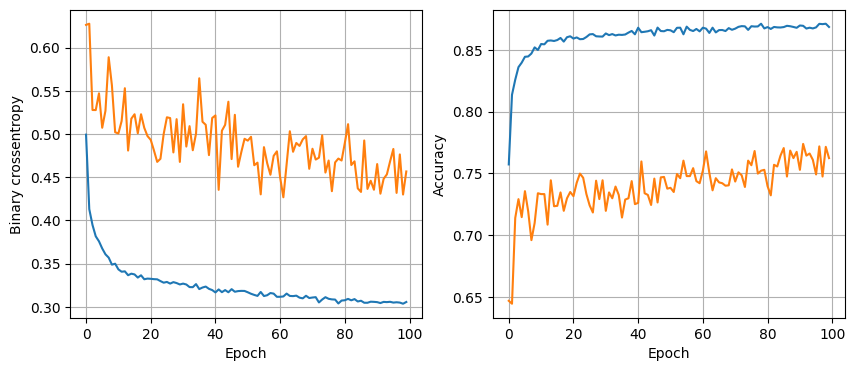

119/119 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8720


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_nn(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

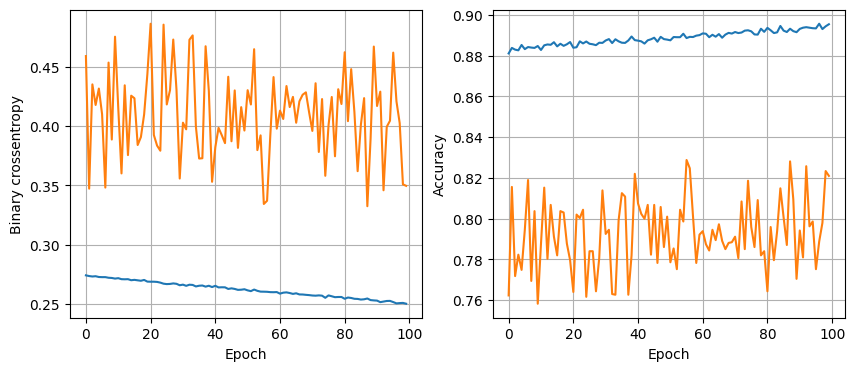

In [ ]:
plot_history(history)

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred >0.5).astype(int).reshape(-1)

print(classification_report(y_test, y_pred))